# Reviewing Statistics and R, part B

This is a continuation of your first lab for the Introduction to Statistical and Mathematical Foundations of Data Science course. 
You can refer to chapters 1 to 3 in [Intro to Statistics textbook](http://onlinestatbook.com/2/index.html) book for reference. 

We will begin with statistics mainly for univariate data analysis, 
covering some basic concepts like descriptive and inferential statistics and distributions.

**We now continue with the final portion of the introductory lab**

## Inferential Statistics

Inferential statistic measures help us draw inferences about larger population from sample data. 
You rarely have access to full population datasets. 

Consider the following: 
The evidence linking cigarette smoking and lung disease is almost irrefutable. 
Based upon this information, what proportion of Americans have given up smoking? 
One way to answer this question would be to survey the entire population of the United States. 
It would be impossible from the standpoint of time and cost-effectiveness. 
Mathematicians have created methods of estimating population parameters from samples drawn from target populations that adequately represent the larger population. 

In inferential statistics we will be answering questions or testing hypotheses about populations based upon samples or prior data. 
Since parameters of populations are generally not available we must rely on sampling techniques to estimate them.

### Sampling Distributions

The sampling distribution represents the distribution of a sample statistic considering all possible samples of a particular size that could come from a given population.  Put another way, a sampling distribution is the frequency distribution of a statistic 
over many random samples from a single population.  A _statistic_ is a numeric description of the sample, while a _parameter_ is a numeric description of the popluation.  We use sample _statistics_ to estimate population _parameters_.  
We know that there will be some error involved when we attempt to relate those sample statistics to population parameters.  This error term can be estimated and is used in inference. 


For example, how do we know the average height of males in this country is 5'9"? If we were to draw one hundred different samples of 10 males at random, we would find a certain amount of variability among the means and standard deviations of the different samples.  The _standard error of the mean_ is defined as the standard deviation of the sampling distribution of the mean. In other words, if you take many random samples from a population, the standard error of the mean is the standard deviation of the different sample means. 

When a researcher asserts something about a population using the information from a sample, this is called an inference.  The researcher makes this inference with the knowledge that there will be some descrepency and thus the possibility that their inference may be mistaken. A _Significance level_ reflects a "tolerance level" with the likelihood of making an incorrect inference.  Some researchers conclude that if the event would occur by chance 5% of time or less, then the event could be attributed to non-chance factors.  In other settings, researchers conclude that if the event would occur by chance 1% of time or less, then the event could be attributed to non-chance factors. These are the 0.05 and 0.01 significance levels. 

The problem/data domain and other factors drive the required significance levels for a particular statistical evaluation.

#### Example 

In the case of male heights, we could choose at random 10 males and their average height would fall 69" $\pm$ 2.25"(1.96) -- in other words, 64.59 to 73.41.  
The sample standard deviation is multiplied by 1.96 since a z-score of $\pm$1.96 would encompasses 95% of the normal distribution. 
Here if we are using 0.05 significance level we would theoretically be correct 95% of the time. 
Also, we would know that 5% of the samples we chose would have a mean height of greater than 73.41" or less than 64.59."


The $\alpha = 0.05$ significance level is associated with a 95% confidence interval.  (The confidence level = 1 - $\alpha$ and is usually expressed as a percentage.)  A confidence interval gives a range of values which is likely to include an unknown population parameter.  This interval is only exact when the population from which the sample is drawn follows a normal distribution. For large samples from other population distributions, the interval is approximately correct, due to the Central Limit Theorem.


In order to perform inferential statistics or parametric tests of significance, 
we'll have to use sampling distributions. 
In order to create a sampling distribution we would need to draw all possible samples of size n from a given population. 
Once we have calculated the mean for each distribution the resulting distribution of these means would represent the sampling distribution of means.

Sampling distributions have 3 characteristics:
* The mean of the sampling distribution will not change with a change in sample size. If the mean from the sampling distribution of means is 20 when n=10, it will remain 20 whether you increase or decrease the size of the samples. Simply put, **the mean of the sampling distribution is equal to the mean of the population**.
* As the sample size in the sampling distribution of means increases, the dispersion of sample means decreases. The larger the n, the more compact the distribution of sample means. As n increases, standard error of the mean decreases.
* If the sampling distribution of means is taken from a normally distributed population, the sample means will also be bell shaped.

Based on the above three characteristics, the **Central Limit Theorem** states:  
If random samples of fixed size n are drawn from any population, as n becomes larger, 
the distribution of sample means approaches normality with the overall mean approaching $\mu$  (i.e., the population mean).
The standard error of the sample means is equal to

$$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt n}$$


### Hypotheses

_Null Hypothesis ($H_0$):_ 
The null hypothesis specifies values for parameters. 
Generally referred to as the "no significant difference" hypothesis. 
A statement like "this class is not significantly different from other statistics classes" is example of a null hypothesis.  Note that most analyses are set up to `reject` or `not reject` the null hypothesis.

_Alternate Hypothesis ($H_1$):_ 
The alternate hypothesis states that the population parameters are something other than the one hypothesized. 
A statement like "this class is different from other statistics classes" is example of an alternate hypothesis. 


<h3 style='color:#A1BB6F'>Four main steps of hypothesis testing </h3>

* State your null hypothesis ($H_0$) and alternative hypothesis ($H_A$)
* Choose a significance level ($\alpha$, alpha) of the test.
* the test procedure, collect data, and calculate a p-value.
* Use your p-value to make a decision:
<br>
<span style='color:red'> 
&nbsp;&nbsp;&nbsp;&nbsp; If p-value $<$ $\alpha$, reject $H_0$
    <br>
&nbsp;&nbsp;&nbsp;&nbsp; If p-value $>$ $\alpha$, do not reject $H_0$
</span>


<span style='color:blue'>Relation between p-value and $\alpha$</span>

* If p-value < $\alpha$, then your results are unlikely when the null is true. There is sufficient evidence to reject the null hypothesis and conclude the alternative. This is called a “statistically significant” result.

* If p-value $> \alpha$, then your results are likely when the null is true. There is insufficient evidence to reject the null hypothesis.



----
Let’s find out the inference with which we can draw from the body dimensions (_bdims_) data set we are going to work on. 
The dataset contains body dimensions data from 247 men and 260 women. 

Let’s say, we want to check the significance of variable `sex` for hypothesis testing. 
Assume that males (`sex=1`) on average are heavier than the average population weight.

To verify this assumption, let’s use a z-test and see if males are actually heavier than the overall population.

$H_0$: There is no significant difference between the average weight of men and the average population weight

$H_1$: There is a significant difference between the average weight of men and the average population weight


Here we are checking if average male weight is different from average population weight. It is a 2-tailed test. For a two tailed test with a significance level of 0.05, the tail on both sides of the distribution is 0.025. (See this link: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/.)  The critical z-scores associated with a two-tailed test at an alpha level of 0.05 are -1.96 and 1.96.  Using a z-score table, we can see that the areas under the standard normal curve that correspond to these critical z-scores are 0.0250 and 0.9750. 

The rejection regions are found to the left of the critical z value of -1.96 and to the right of the critical z value of 1.96.

In [1]:
download.file("http://www.openintro.org/stat/data/bdims.RData", destfile = "bdims.RData")
load("bdims.RData")

A quick peek into the first few rows of data...  
Note that the weight (`wgt`) and `sex` are in the last three columns of data.

In [2]:
head(bdims)
summary(bdims)

bia.di,bii.di,bit.di,che.de,che.di,elb.di,wri.di,kne.di,ank.di,sho.gi,⋯,bic.gi,for.gi,kne.gi,cal.gi,ank.gi,wri.gi,age,wgt,hgt,sex
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<fct>
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,⋯,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,⋯,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,⋯,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,⋯,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,⋯,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,⋯,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


     bia.di          bii.di          bit.di          che.de     
 Min.   :32.40   Min.   :18.70   Min.   :24.70   Min.   :14.30  
 1st Qu.:36.20   1st Qu.:26.50   1st Qu.:30.60   1st Qu.:17.30  
 Median :38.70   Median :28.00   Median :32.00   Median :19.00  
 Mean   :38.81   Mean   :27.83   Mean   :31.98   Mean   :19.23  
 3rd Qu.:41.15   3rd Qu.:29.25   3rd Qu.:33.35   3rd Qu.:20.90  
 Max.   :47.40   Max.   :34.70   Max.   :38.00   Max.   :27.50  
     che.di          elb.di          wri.di          kne.di     
 Min.   :22.20   Min.   : 9.90   Min.   : 8.10   Min.   :15.70  
 1st Qu.:25.65   1st Qu.:12.40   1st Qu.: 9.80   1st Qu.:17.90  
 Median :27.80   Median :13.30   Median :10.50   Median :18.70  
 Mean   :27.97   Mean   :13.39   Mean   :10.54   Mean   :18.81  
 3rd Qu.:29.95   3rd Qu.:14.40   3rd Qu.:11.20   3rd Qu.:19.60  
 Max.   :35.60   Max.   :16.70   Max.   :13.30   Max.   :24.30  
     ank.di          sho.gi           che.gi           wai.gi      
 Min.   : 9.90   Min. 

From the above result you see that every observation has 25 measurements. 
The variable names description can be found at http://www.openintro.org/stat/data/bdims.php. 
We will work with just two columns for now: weight in kg (`wgt`) and `sex` (1 indicates male, 0 indicates female).

Let's go ahead and create two different data sets: one for men and one for women.

In [3]:
male <- subset(bdims, sex == 1)
female <- subset(bdims, sex == 0)

### Find the test statistic


#### calculating Z-score

A z-score represents the number of standard deviations a particular score is from the population mean.  
      
The formula for the z-statistic is given as 

$$Z = \frac{\bar{X}-\mu}{\sigma_{\bar{x}}}$$

where,
* $\bar{x}$ = sample mean,
* $\mu$ = population mean and  
* $\sigma_{\bar{x}}$ = standard deviation of the sampling distribution of $\bar{x}$  

The below code computes some means, variances, z-scores, etc. of the bdims data set.  Recall from the Introduction notebook that variance is the average of the squared differences from the mean.  Standard deviation is the square root of the variance.

In [4]:
 sample_mean = mean(male$wgt)
 pop_mean = mean(bdims$wgt)
 pop_var = var(bdims$wgt)
 print(paste("sample mean : ",sample_mean))
 print(paste("population mean : ",pop_mean))
 print(paste("population variance : ",pop_var))
 zscore = (sample_mean - pop_mean) / (sqrt(pop_var)) #Standard Deviation
 print(paste("Z-score : ",zscore))

[1] "sample mean :  78.1445344129555"
[1] "population mean :  69.1475345167653"
[1] "population variance :  178.109376320447"
[1] "Z-score :  0.67414656194716"


The z score is 0.67 after rounding it to 2 decimals. 
Now we need to work out the p-value.

<h3 style='color:#685BEA'>Percentiles</h3>
<br>

* Percentile is the percentage of observations that fall below (i.e., to the left of) a given data point
* Graphically, percentile is the area under the probability distribution curve to the left of that observation.

<img src="../images/percentiles.png">

We refer to the standard normal distribution table to find out this percentage value. 

![Standard Normal Distribution Table](../images/normal-table-large.png)

To read the table (i.e., to find our table area), we break our z-score into two parts 0.67 = 0.6 (_tenths_) + 0.07 (_hundredths_)

The tenths component is used to find the appropriate row in the table.  The hundreths component is used for the column. You then find the cell in the table for that row and column, and this represents the % of the population that exhibits a smaller value than that which you obtained.

Using the table, we can see that the table area is 0.7486.

A p-value is, for one-tailed tests, a tail area or, for two-tailed tests, twice the tail area.  The tail area is the "small" part of the curve.  If z is positive, then the tail area is the area under the curve to the right of z.  In this case, tail area = 1 - table area.  If z is negative, then the tail area is the area under the curve to the left of z.  In this case, tail area = table area.  Using symmetry of the normal curve, we can write tail area = 1 - table area for $|z|$ = table area for $-|z|$.

Again, the p-value is either the tail area (if the test is one-sided) or twice the tail area (if the test is two sided).

We are dealing with a two-tailed hypothesis test with a stated alpha level of 0.05. Thus, again, the critical Z scores for this distribution are -1.96 and 1.96.  This mean we would reject the null hypothesis if the computed value of z from the sample (in this case z = .67) were less than -1.96 or greater than +1.96.  Because z = .67 is in the middle, we cannot reject the null hypothesis.

The table area for z = .67 is .7486.  The tail area is 1 - .7486 = .2514.  Because the test is two-tailed, the p-value = 2(.2514) = .5028.

The returned z score (0.67) does not lie within the rejection region, which is z<-1.96 or z>+1.96.  That is to say, .67 lies between -1.96 and 1.96, so there is insufficient evidence to reject the null hypothesis.

Put another way <b>p-value (0.5028) >  $\alpha$ (0.05),</b> so we cannot reject the null hypothesis.

Lets plot the z-score and critical value for our hypothesis testing. To plot z-score values, data should be normally distributed. <span style="color:#ce7f5c"> scale() </span> will normalize the data. The areas outside of red lines on both sides are critical regions. The critical value represented by green line is within critical region. So we fail to reject the null hypothesis. 

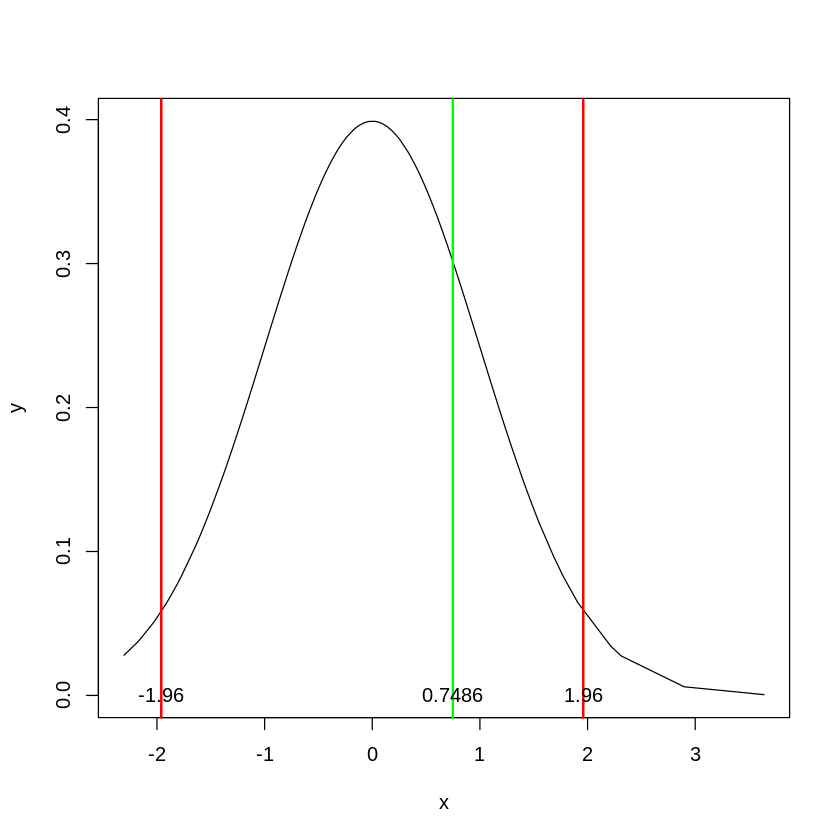

In [5]:
x = scale(male$wgt)
y <- dnorm(x, mean=mean(x), sd=(sqrt(var(x))))
plot(x, y, type="n", lwd=1)
lines(x[order(x)], y[order(x)], pch=16)
abline(v = 0.7486, col = "green", lwd = 2)
abline(v = 1.96, col = "red", lwd = 2)
abline(v = -1.96, col = "red", lwd = 2)
text(x=c(-1.96, 0.7486, 1.96),y=0, labels=c("-1.96","0.7486", "1.96"))

### Chi-Square analysis

A non parametric test of significance is one that makes no assumption concerning the shape of the population distribution and is commonly referred to as a _distribution-free_ test of significance. 
Non parametric procedures are more suitable when data is categorical and for group comparison research.

Chi square ($\chi^2$) allows us to determine whether or not the proportion of observations 
within mutually exclusive categories differs significantly from the proportions expected by statistical chance. 

### Chi-Square Goodness of Fit

This is the one variable (univariate) case and is used to determine whether significant differences occur within a single group. 
The null hypothesis can be tested by applying the formula below. 

$$\chi^2 = \sum\frac{(f_o - f_e)^2}{f_e}$$

where,

* $f_o$ = the observed number in a given category, and
* $f_e$ = the expected number in that category

For example, a psychology department at a university has three emphasis area options available for incoming students: clinical psychology, educational psychology and counseling psychology. 
If students were to randomly select an area for study,
probability would suggest that one-third would choose clinical psychology, 
one-third would choose educational psychology and one-third would choose counseling psychology. 
Let's say, there are 100 incoming students and 45 choose clinical psychology, 
30 choose educational psychology and 25 choose counseling psychology. 

We can construct a set of hypotheses to determine if differences in the number of students selecting each emphasis area are significantly different from out expectation, given our expectation is that each option will be selected by 1/3 of the students).
We start with our Null Hypothesis and Alternative Hypothesis.

$H_0$: No significant differences exist among students choosing academic options within psychology.

$H_1$: Significant differences exist among students choosing academic options within psychology (relative to our expectation that each option will be selected by 1/3 of students).

Test: $\chi^2$

$\alpha$: 0.5

Sampling Distribution: degrees of freedom: K-1 = 2      where K is the number of groups


<table>
<tr>
<td>Cell 1 <br> Clicinal <br> Psychology </td>
<td>Cell 2 <br> Educational <br> Psychology </td>
<td>Cell 3 <br> Counseling <br> Psychology </td>
</tr>
<tr>
<td>$f_o$=45 <br> $f_e$=33.3 </td>
<td>$f_o$=30 <br> $f_e$=33.3 </td>
<td>$f_o$=25 <br> $f_e$=33.3 </td>
</tr>
</table>

$$\chi^2 = \frac{(45 - 33.3)^2}{33.3} + \frac{(30 - 33.3)^2}{33.3} + \frac{(25 - 33.3)^2}{33.3}$$

$$ = 4.10 + 0.33 + 2.08$$

$$ = 6.51$$

Decision: 
Since the calculated $\chi^2$ value of 6.51 exceeds the table value of 5.991 we would reject the null hypothesis. 
  * [See Chi Square table here](http://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)

### Chi-Square Test of Independence

Chi square test of independence of categorical variables is used when we describe differences between two or more groups in a two way table. 
It returns the probability for the computed chi-square distribution with the degree of freedom selected.

Probability of 0: It indicates that both categorical variables are dependent.

Probability of 1: It shows that both variables are independent.

Probability less than 0.05: It indicates that the relationship between the variables is significant, given an alpha level of 0.05.

We will use the built-in function `chisq.test()`

In [7]:
help(chisq.test)
chisq.test(c(bdims$wgt,bdims$sex))


	Chi-squared test for given probabilities

data:  c(bdims$wgt, bdims$sex)
X-squared = 35415, df = 1013, p-value < 2.2e-16


In [8]:
chisq.test(c(bdims$wgt, bdims$hgt))


	Chi-squared test for given probabilities

data:  c(bdims$wgt, bdims$hgt)
X-squared = 23073, df = 1013, p-value < 2.2e-16


Since the **p values** in both cases are < 0.05,
we can infer that height and sex are highly significant variables and must be included in our final data modeling stage.
We should perform chi squared tests on other variables in the dataset to see if they are 
significant and should be included in any data modeling.

##### Correlation:

Correlation determines the level of association between two variables. 
A scatter plot among the variables is one of the ways to find correlations between variables. 

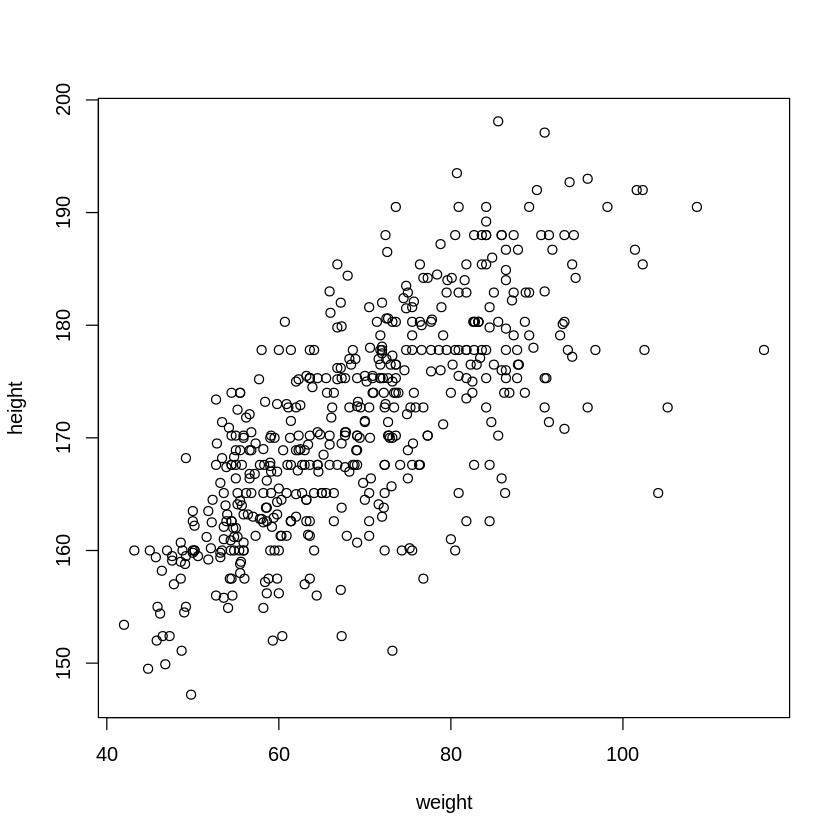

In [9]:
plot(bdims$wgt, bdims$hgt, xlab = 'weight', ylab = 'height')

We see a positive correlation among `hgt` and `wgt` variables. 
R has a built-in function to measure the correlation. 
Let's use the `cor.test()` function to verify that height and weight variables are correlated.

In [10]:
help(cor.test)
cor.test(bdims$wgt, bdims$hgt, method = 'pearson')


	Pearson's product-moment correlation

data:  bdims$wgt and bdims$hgt
t = 23.135, df = 505, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6722075 0.7570923
sample estimates:
      cor 
0.7173011 


As the scatter plot suggests, the correlation function supports our assumption that height and weight are associated. 
The level of corelation is 0.717. 

You can perform tests on other variables in the dataset and similarly find associations among other variables. 
Variables that are highly correlated, e.g., 0.99 correlation, do not add much information to a predictive model. 
Therefore, when you have two indepedent variables that are highly correlated, you can usually drop one of these variables from your final model input design.

### This concludes the whirlwind review of descriptive and inferential statistics